# Income Prediction using Random Forest Classsifier

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\MRINALINI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv("adult.csv")
df=pd.DataFrame(data)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
print(df.isnull().sum())
print(df.dtypes)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [8]:
#removing '?' containing rows
df = df[(df != '?').all(axis=1)]

#label the income objects as 0 and 1
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

# Visualization of graph

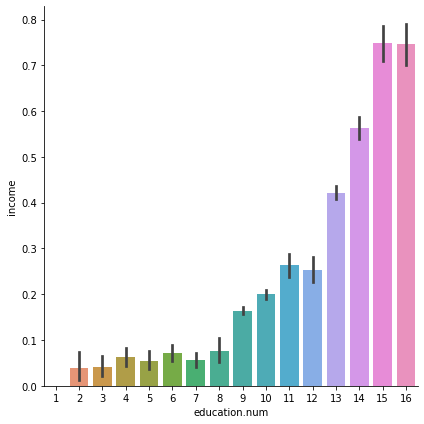

In [9]:
sns.catplot(x='education.num',y='income',data=df,kind='bar',height=6) #catplot show relationship between numerical variable and 
#one or more categorical variables
plt.show()

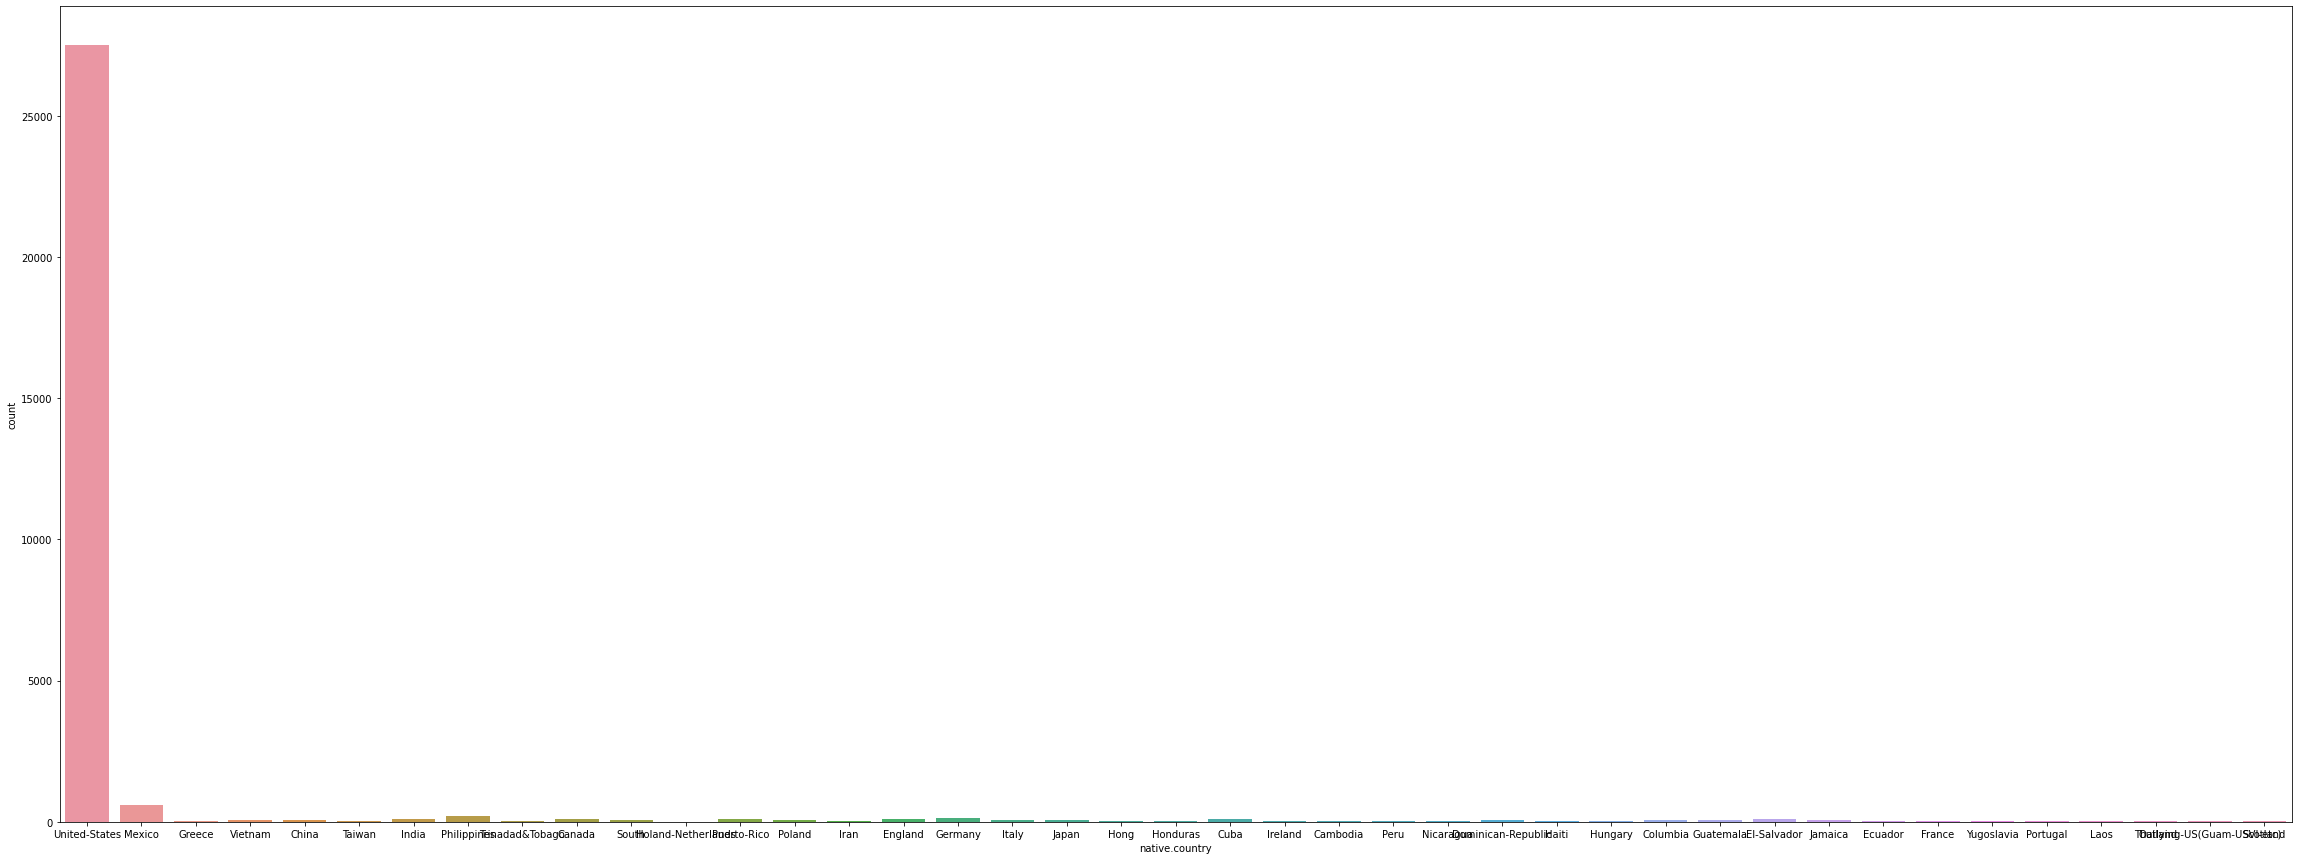

In [10]:
#explore which country do most people belong
plt.figure(figsize=(40,15))
sns.countplot(x='native.country',data=df)
plt.show()

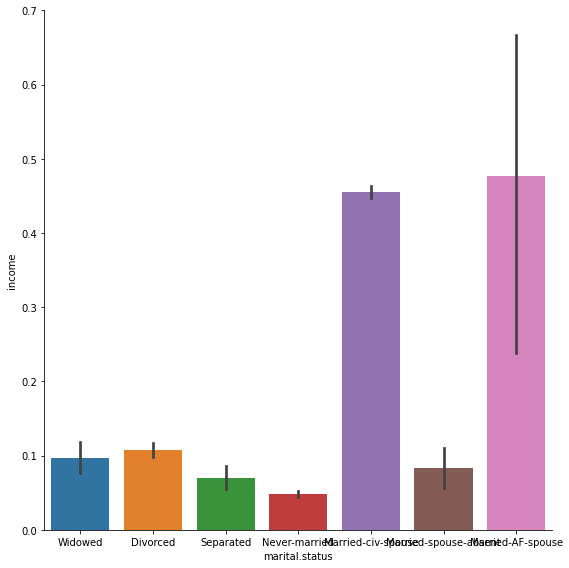

In [11]:
#marital.status vs income
sns.factorplot(x='marital.status',y='income',data=df,kind='bar',height=8) #A factor plot is simply the same plot 
#generated for different response and factor variables and arranged on a single page.
plt.show()

# Feature Extraction

In [12]:
#we can reformat marital.status values to single and married
df['marital.status']=df['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

In [13]:
#Label Encoding
for column in df:
    le=LabelEncoder()
    if df.dtypes[column]==np.object:
         df[column]=le.fit_transform(df[column])

In [14]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,1,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,1,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,1,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,1,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,1,0,4,4,1,0,3770,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,310152,15,10,1,10,1,4,1,0,0,40,38,0
32557,27,2,257302,7,12,0,12,5,4,0,0,0,38,38,0
32558,40,2,154374,11,9,0,6,0,4,1,0,0,40,38,1
32559,58,2,151910,11,9,1,0,4,4,0,0,0,40,38,0


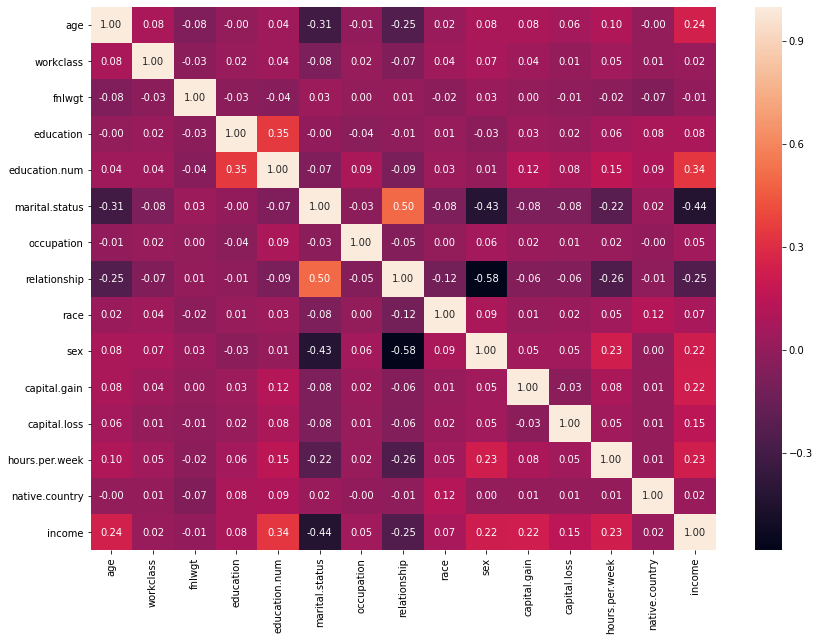

In [15]:
#Correlation using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [16]:
#We can drop the features that are highly correlated
df=df.drop(['relationship','education'],axis=1)

In [17]:
df=df.drop(['occupation','fnlwgt','native.country'],axis=1)

In [18]:
df

,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,income
1,82,2,9,1,4,0,0,4356,18,0
3,54,2,4,1,4,0,0,3900,40,0
4,41,2,10,1,4,0,0,3900,40,0
5,34,2,9,1,4,0,0,3770,45,0
6,38,2,6,1,4,1,0,3770,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,22,2,10,1,4,1,0,0,40,0
32557,27,2,12,0,4,0,0,0,38,0
32558,40,2,9,0,4,1,0,0,40,1
32559,58,2,9,1,4,0,0,0,40,0


# Building the model

In [20]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
print(x.head())
print(y.head())
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,shuffle=False)

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  
1          4356              18  
3          3900              40  
4          3900              40  
5          3770              45  
6          3770              40  
1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64


In [22]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,xtrain,ytrain,cv=10)
print(cv_res.mean()*100)

76.69259164907089


In [24]:
#Grid Search
#---USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(xtrain,ytrain)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.8105205859065716
params {'max_features': 5, 'min_samples_leaf': 25, 'n_estimators': 150}


In [25]:
#Fit the model with tuned parameters
clf=RandomForestClassifier(n_estimators=150,max_features=5,min_samples_leaf=25)
clf.fit(xtrain,ytrain)

RandomForestClassifier(max_features=5, min_samples_leaf=25, n_estimators=150)

In [26]:
#Make predictions
predy=clf.predict(xtest)
predy

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
#Accuracy score
print("Accuracy: %f " % (100*accuracy_score(ytest, predy)))

Accuracy: 84.739803 
